In [360]:
%matplotlib notebook

from modsim import *


In [361]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [362]:
condition = Condition(g = -9.8 * m/s**2,
                     point_a = (0.0 * m, 10.0 * m),
                     point_b = (10.0 * m, 0.0 * m),
                     length = .15 * m,
                     width = .15* m,
                     height = .15 * m,
                     rho = 1.225 *kg/m**3,
                     v_init= 0 * m/s,
                     C_d = 0.8,
                     C_f = .02,
                     density = 1920 * kg/m**3,
                     t0=0)

In [348]:
condition_dimensionless = Condition(g = -9.8,
                     point_a = (0.0, 10.0),
                     point_b = (10.0, 0.0),
                     length = .15,
                     width = .15,
                     height = .15,
                     rho = 1.225,
                     v_init= 0,
                     C_d = 0.8,
                     C_f = .02,
                     density = 1920,
                     t0=0)

In [367]:
def make_system(condition, slope= None):
    unpack(condition)
    
    mass= length*width*height*density
    surface_area = height*width
    
    init= State(x= point_a[0], y= point_a[1], v=v_init)
    system=System(init=init, condition=condition, slope=slope, mass=mass, sa=surface_area, dt=.0008)
    return system

In [350]:
system= make_system(condition_dimensionless, slope = -1)
system.condition

,value
g,-9.8
point_a,"(0.0, 10.0)"
point_b,"(10.0, 0.0)"
length,0.15
width,0.15
height,0.15
rho,1.225
v_init,0
C_d,0.8
C_f,0.02


In [399]:
def update_func(system):
    
    unpack(system)
    
    slope = system.slope
    if init.y <= 0:
        slope = 0
        
    theta= np.arctan(slope)
    
    
    f_drag = .5 * condition.C_d * rho * init.v**2 * sa 
    f_fric = condition.C_f * mass * condition.g * np.cos(theta)
    f_grav = mass * condition.g * np.sin(theta)
    #print (f_drag, f_fric, f_grav)
    f_total =  -f_drag + f_fric + f_grav
    a = f_total/mass
    
    init.v += a*dt
    
    vx = init.v * np.cos(theta)
    vy = init.v * np.sin(theta)
    
    init.x += vx*dt
    init.y += vy*dt
    
    return State(x=init.x, y=init.y, v=init.v)

In [352]:
update_func(system)

,value
x,0.000005
y,9.999995
v,0.006930


In [353]:
def run_simulation(system, update_func):
    unpack(system)
    frame = TimeFrame(columns= init.index)
    frame.loc[condition.t0] = init
    
    t = condition.t0
    x = init.x
    y = init.y
    v = init.v
    
    while init.x < condition.point_b[0]:
        t += dt
        frame.loc[t] = update_func(system)
        
    system.results = frame
    return t

In [354]:
t = run_simulation(system, update_func)
print(t)

2.0189999999998887


In [355]:
def time (slope, condition):
    system = make_system(condition_dimensionless, slope)
    t = run_simulation(system, update_func)
    return t

In [396]:
slopes= linspace(-3, -1, 20)
sweep = SweepSeries()

for slope in slopes:
    t = time(slope, condition)
    print(slope, t)
    sweep[slope] = t

-3.0 2.00239999999991
-2.89473684211 1.9991999999999104
-2.78947368421 1.9959999999999107
-2.68421052632 1.992799999999911
-2.57894736842 1.9903999999999114
-2.47368421053 1.9871999999999117
-2.36842105263 1.983999999999912
-2.26315789474 1.9807999999999124
-2.15789473684 1.9783999999999127
-2.05263157895 1.975999999999913
-1.94736842105 1.9743999999999131
-1.84210526316 1.9735999999999132
-1.73684210526 1.9727999999999133
-1.63157894737 1.9743999999999131
-1.52631578947 1.9767999999999128
-1.42105263158 1.9815999999999123
-1.31578947368 1.9895999999999114
-1.21052631579 2.00239999999991
-1.10526315789 2.021599999999908
-1.0 2.048799999999905


<IPython.core.display.Javascript object>


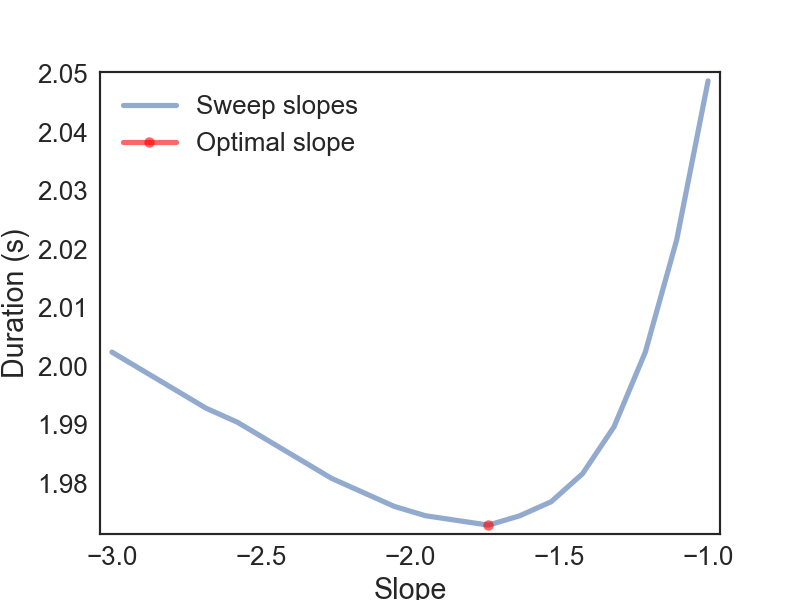

Saving figure to file sweep.svg


In [398]:
newfig()
plot(sweep, label='Sweep slopes')
plot([-1.73684210526], [1.9727999999999133], marker='o', markersize=6, color="red", label='Optimal slope')
decorate(xlabel='Slope',
         ylabel='Duration (s)')
savefig('sweep.svg')

In [383]:
min_bounded(time, [-2, -1], condition_dimensionless)

     fun: 1.9727999999999133
 message: 'Solution found.'
    nfev: 16
  status: 0
 success: True
       x: -1.7916226571497755

In [40]:
system.init

,value
x,10.00541
y,-0.00541
v,8.69801


In [400]:
system1 = make_system(condition_dimensionless, slope = -1)
system2 = make_system(condition_dimensionless, slope = -1.7916226571497755)
system3 = make_system(condition_dimensionless, slope = -5)
system1.dt = .01
system2.dt = .01
system3.dt = .01
t1 = run_simulation(system1, update_func)
t2 = run_simulation(system2, update_func)
t3 = run_simulation(system3, update_func)
frame1 = system1.results
frame2 = system2.results
frame3 = system3.results

<IPython.core.display.Javascript object>


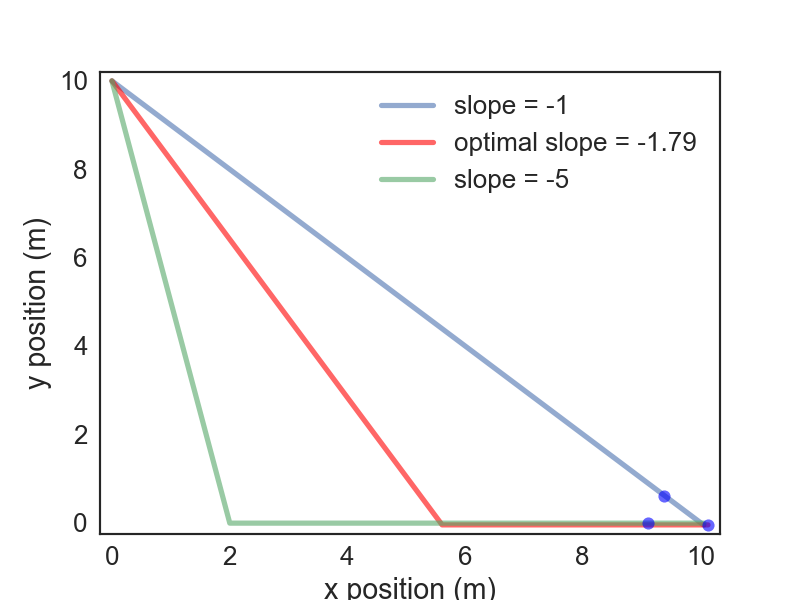

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Saving figure to file position-comparison.svg


In [418]:
newfig()


plot(frame1.x, frame1.y, label='slope = -1')
plot(frame2.x, frame2.y, color="red", label='optimal slope = -1.79')
plot(frame3.x, frame3.y, label='slope = -5')
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         legend=True)

count = 0
for x1, y1, x2, y2, x3, y3 in zip(frame1.x, frame1.y, frame2.x, frame2.y, frame3.x, frame3.y):
#     count += 1
#     if count%100 != 0:
#         continue
    plot([x1, x2, x3], [y1, y2, y3], 'bo', update=True)

savefig('position-comparison.svg')  

<IPython.core.display.Javascript object>


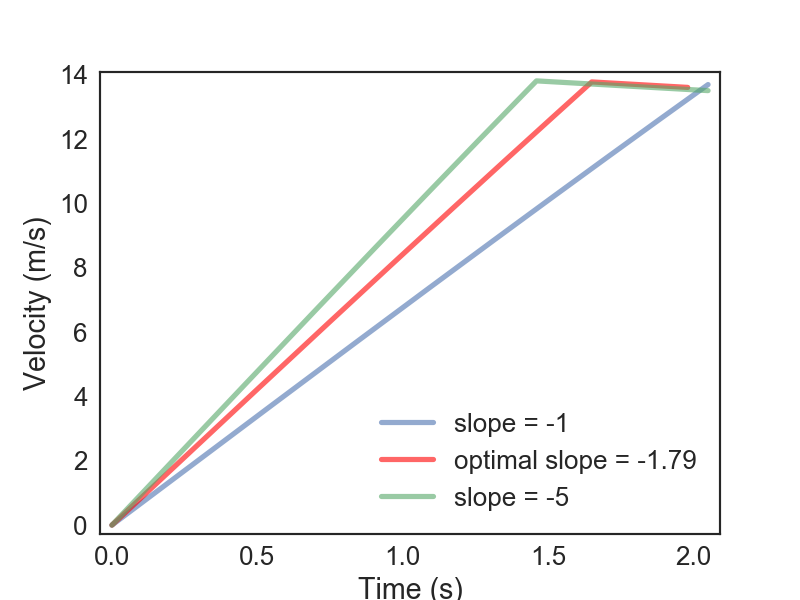

Saving figure to file velocity-comparison.svg


In [417]:
newfig()
plot(frame1.v, label='slope = -1')
plot(frame2.v, color="red", label='optimal slope = -1.79')
plot(frame3.v, label='slope = -5')
decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)',
         legend=True)
savefig('velocity-comparison.svg') 